In [ ]:
# Impor library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# --- 1. Memuat Dataset ---

# Ganti path jika file Anda diunggah di folder tertentu
try:
    df = pd.read_csv('/content/drive/MyDrive/2306130/Semester 4/dataset/Job_Placement_Data.csv')
    print("✅ Dataset berhasil dimuat.")
except FileNotFoundError:
    print("❌ File 'Job_Placement_Data.csv' tidak ditemukan. Silakan unggah ulang.")
    raise

✅ Dataset berhasil dimuat.


In [ ]:
# --- 2. Analisis dan Persiapan Awal ---
print("\n--- Analisis dan Persiapan Awal ---")

# Tampilkan 5 baris pertama untuk verifikasi kolom
print("\n5 Baris Pertama Data:")
print(df.head())


--- Analisis dan Persiapan Awal ---

5 Baris Pertama Data:
  gender  ssc_percentage ssc_board  hsc_percentage hsc_board hsc_subject  \
0      M           67.00    Others           91.00    Others    Commerce   
1      M           79.33   Central           78.33    Others     Science   
2      M           65.00   Central           68.00   Central        Arts   
3      M           56.00   Central           52.00   Central     Science   
4      M           85.80   Central           73.60   Central    Commerce   

   degree_percentage undergrad_degree work_experience  emp_test_percentage  \
0              58.00         Sci&Tech              No                 55.0   
1              77.48         Sci&Tech             Yes                 86.5   
2              64.00        Comm&Mgmt              No                 75.0   
3              52.00         Sci&Tech              No                 66.0   
4              73.30        Comm&Mgmt              No                 96.8   

  specialisati

In [ ]:
# Tampilkan informasi dasar dan tipe data
print("\nInformasi Dataset:")
df.info()


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [ ]:
# Cek apakah ada kolom 'salary'. Kolom ini tidak boleh digunakan sebagai fitur
# karena menyebabkan kebocoran data (hanya ada untuk yang ditempatkan).
if 'salary' in df.columns:
    print("\nKolom 'salary' ditemukan. Menghapus kolom 'salary'...")
    df = df.drop('salary', axis=1)

In [ ]:
# Memeriksa nilai yang hilang (missing values)
print("\nJumlah Nilai yang Hilang per Kolom:")
print(df.isnull().sum())


Jumlah Nilai yang Hilang per Kolom:
gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64


In [ ]:
# Jika ada nilai yang hilang, kita bisa mengisinya atau menghapusnya.
# Untuk kesederhanaan, kita akan menghapus baris dengan data yang hilang jika ada.
df.dropna(inplace=True)


--- Analisis Data Eksplorasi (EDA) ---


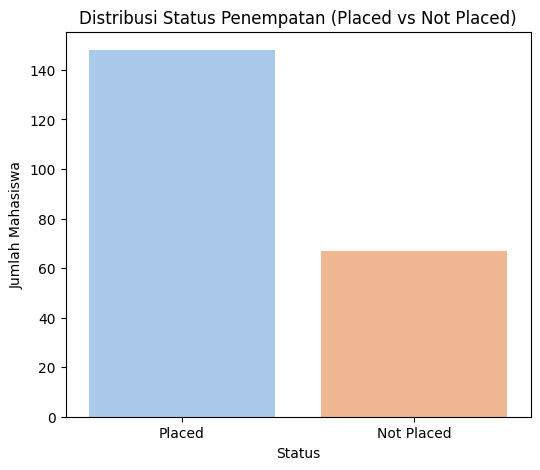

In [ ]:
# --- 3. Analisis Data Eksplorasi (EDA) ---
print("\n--- Analisis Data Eksplorasi (EDA) ---")

# Visualisasi variabel target 'status'
plt.figure(figsize=(6, 5))
sns.countplot(x='status', data=df, palette='pastel')
plt.title('Distribusi Status Penempatan (Placed vs Not Placed)')
plt.xlabel('Status')
plt.ylabel('Jumlah Mahasiswa')
plt.show()

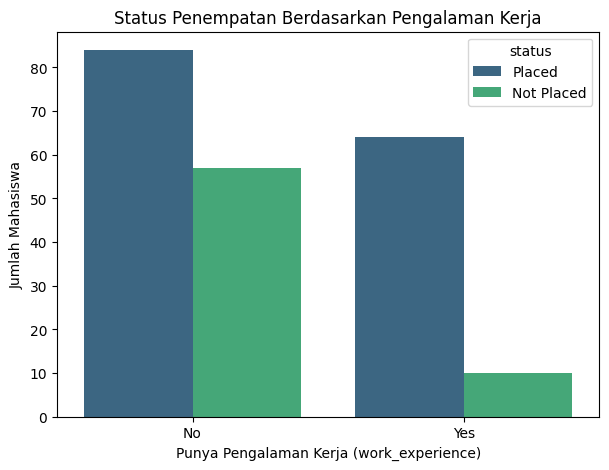

In [ ]:
# Visualisasi status penempatan berdasarkan 'work_experience'
plt.figure(figsize=(7, 5))
sns.countplot(x='work_experience', hue='status', data=df, palette='viridis')
plt.title('Status Penempatan Berdasarkan Pengalaman Kerja')
plt.xlabel('Punya Pengalaman Kerja (work_experience)')
plt.ylabel('Jumlah Mahasiswa')
plt.show()

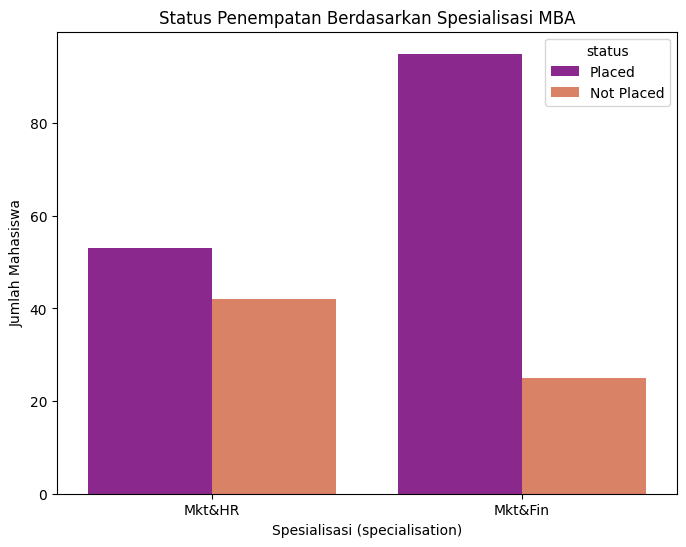

In [ ]:
# Visualisasi status penempatan berdasarkan spesialisasi MBA ('specialisation')
plt.figure(figsize=(8, 6))
sns.countplot(x='specialisation', hue='status', data=df, palette='plasma')
plt.title('Status Penempatan Berdasarkan Spesialisasi MBA')
plt.xlabel('Spesialisasi (specialisation)')
plt.ylabel('Jumlah Mahasiswa')
plt.show()

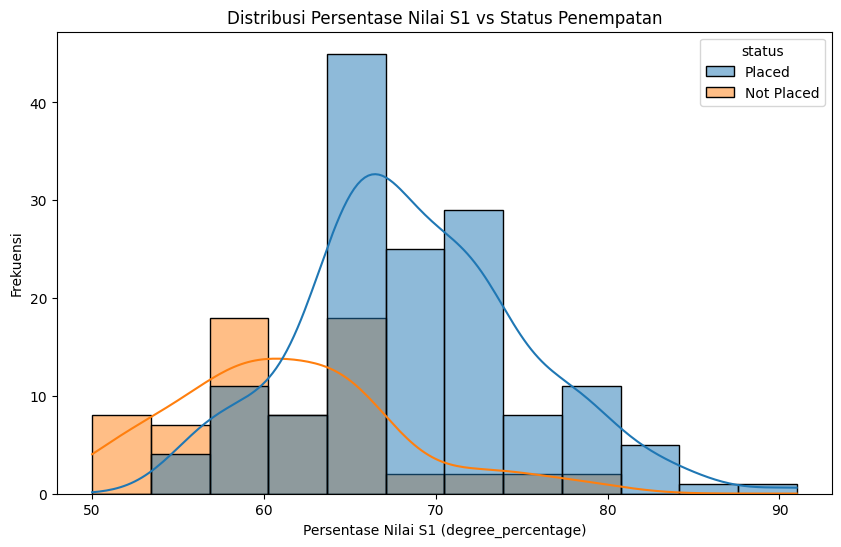

In [ ]:
# Melihat distribusi nilai 'degree_percentage'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='degree_percentage', hue='status', kde=True)
plt.title('Distribusi Persentase Nilai S1 vs Status Penempatan')
plt.xlabel('Persentase Nilai S1 (degree_percentage)')
plt.ylabel('Frekuensi')
plt.show()

In [ ]:
# --- 4. Pra-pemrosesan Data (Encoding) ---
print("\n--- Pra-pemrosesan Data ---")

# Salin dataframe untuk menghindari SettingWithCopyWarning
df_processed = df.copy()


--- Pra-pemrosesan Data ---


In [ ]:
# Identifikasi kolom kategorikal
categorical_cols = df_processed.select_dtypes(include=['object']).columns

In [ ]:

# Terapkan Label Encoding ke setiap kolom kategorikal
label_encoder = LabelEncoder()
for col in categorical_cols:
    df_processed[col] = label_encoder.fit_transform(df_processed[col])
    print(f"Kolom '{col}' telah di-encode.")

print("\nDataset setelah encoding:")
print(df_processed.head())

Kolom 'gender' telah di-encode.
Kolom 'ssc_board' telah di-encode.
Kolom 'hsc_board' telah di-encode.
Kolom 'hsc_subject' telah di-encode.
Kolom 'undergrad_degree' telah di-encode.
Kolom 'work_experience' telah di-encode.
Kolom 'specialisation' telah di-encode.
Kolom 'status' telah di-encode.

Dataset setelah encoding:
   gender  ssc_percentage  ssc_board  hsc_percentage  hsc_board  hsc_subject  \
0       1           67.00          1           91.00          1            1   
1       1           79.33          0           78.33          1            2   
2       1           65.00          0           68.00          0            0   
3       1           56.00          0           52.00          0            2   
4       1           85.80          0           73.60          0            1   

   degree_percentage  undergrad_degree  work_experience  emp_test_percentage  \
0              58.00                 2                0                 55.0   
1              77.48                 2

In [ ]:

# --- 5. Memisahkan Fitur dan Target ---
print("\n--- Memisahkan Fitur dan Target ---")

# Target (y) adalah kolom 'status'
y = df_processed['status']

# Fitur (X) adalah semua kolom kecuali 'status'
X = df_processed.drop('status', axis=1)


--- Memisahkan Fitur dan Target ---


In [ ]:
print("\nContoh Fitur (X):")
print(X.head())
print("\nContoh Target (y):")
print(y.head())


Contoh Fitur (X):
   gender  ssc_percentage  ssc_board  hsc_percentage  hsc_board  hsc_subject  \
0       1           67.00          1           91.00          1            1   
1       1           79.33          0           78.33          1            2   
2       1           65.00          0           68.00          0            0   
3       1           56.00          0           52.00          0            2   
4       1           85.80          0           73.60          0            1   

   degree_percentage  undergrad_degree  work_experience  emp_test_percentage  \
0              58.00                 2                0                 55.0   
1              77.48                 2                1                 86.5   
2              64.00                 0                0                 75.0   
3              52.00                 2                0                 66.0   
4              73.30                 0                0                 96.8   

   specialisation  

In [ ]:
# --- 6. Membagi Data menjadi Data Latih dan Data Uji ---
print("\n--- Membagi Data Latih dan Uji ---")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Ukuran data latih: {X_train.shape[0]} sampel")
print(f"Ukuran data uji: {X_test.shape[0]} sampel")


--- Membagi Data Latih dan Uji ---
Ukuran data latih: 172 sampel
Ukuran data uji: 43 sampel


In [ ]:
# --- 7. Membangun dan Melatih Model ---

# A. Logistic Regression
print("\n--- Melatih Model Logistic Regression ---")
lr_model = LogisticRegression(max_iter=2000, random_state=42)
lr_model.fit(X_train, y_train)
print("Model Logistic Regression berhasil dilatih.")


--- Melatih Model Logistic Regression ---
Model Logistic Regression berhasil dilatih.


In [ ]:

# B. Random Forest Classifier
print("\n--- Melatih Model Random Forest Classifier ---")
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)
rf_model.fit(X_train, y_train)
print("Model Random Forest Classifier berhasil dilatih.")


--- Melatih Model Random Forest Classifier ---
Model Random Forest Classifier berhasil dilatih.


In [ ]:
# --- 8. Mengevaluasi Model ---
print("\n--- Evaluasi Kinerja Model ---")

# Prediksi menggunakan data uji
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)


--- Evaluasi Kinerja Model ---



--- Hasil Evaluasi Logistic Regression ---
Akurasi: 0.8140

Laporan Klasifikasi:
              precision    recall  f1-score   support

  Not Placed       0.67      0.77      0.71        13
      Placed       0.89      0.83      0.86        30

    accuracy                           0.81        43
   macro avg       0.78      0.80      0.79        43
weighted avg       0.82      0.81      0.82        43


Confusion Matrix:


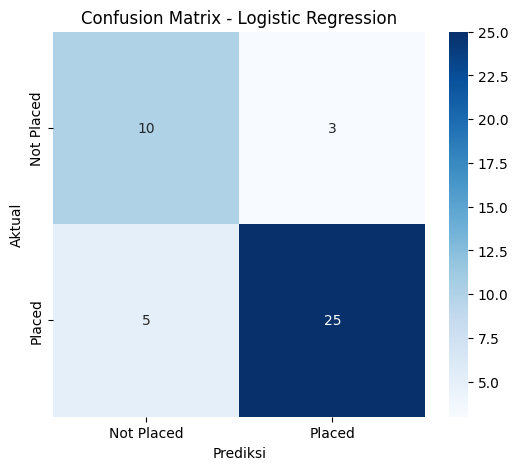

In [ ]:
# A. Evaluasi Logistic Regression
print("\n--- Hasil Evaluasi Logistic Regression ---")
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Akurasi: {lr_accuracy:.4f}")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, lr_predictions, target_names=['Not Placed', 'Placed']))
print("\nConfusion Matrix:")
lr_cm = confusion_matrix(y_test, lr_predictions)
plt.figure(figsize=(6,5))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Placed', 'Placed'], yticklabels=['Not Placed', 'Placed'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()



--- Hasil Evaluasi Random Forest Classifier ---
Akurasi: 0.8372

Laporan Klasifikasi:
              precision    recall  f1-score   support

  Not Placed       0.80      0.62      0.70        13
      Placed       0.85      0.93      0.89        30

    accuracy                           0.84        43
   macro avg       0.82      0.77      0.79        43
weighted avg       0.83      0.84      0.83        43


Confusion Matrix:


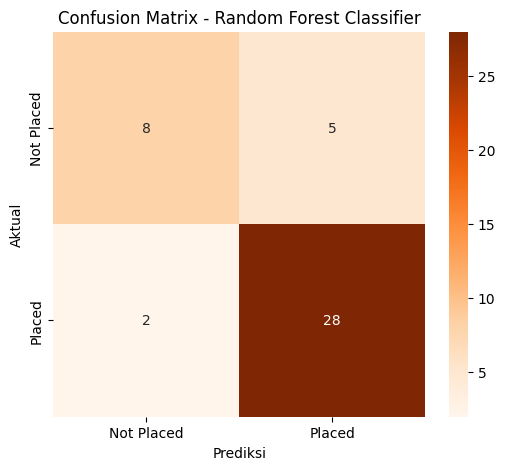

In [ ]:

# B. Evaluasi Random Forest Classifier
print("\n--- Hasil Evaluasi Random Forest Classifier ---")
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Akurasi: {rf_accuracy:.4f}")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, rf_predictions, target_names=['Not Placed', 'Placed']))
print("\nConfusion Matrix:")
rf_cm = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(6,5))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Not Placed', 'Placed'], yticklabels=['Not Placed', 'Placed'])
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [ ]:
# --- 9. Perbandingan Hasil ---
print("\n--- Perbandingan Akurasi Model ---")
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [lr_accuracy, rf_accuracy]
})
print(models.sort_values(by='Accuracy', ascending=False))


--- Perbandingan Akurasi Model ---
                 Model  Accuracy
1        Random Forest  0.837209
0  Logistic Regression  0.813953
